In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Charlotte.preprocessing import LabelEncoding
from Charlotte.explor_visuals import PiePlot,Countplot_Visual
%matplotlib inline
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("data/loan_data_2007_2014.csv")
df.head()

/tmp/ipykernel_6430/4100477804.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan_data_2007_2014.csv")


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

#### Droping feature

In [5]:
df = df.drop(["Unnamed: 0","id","member_id","url","zip_code",
              "open_il_24m","open_il_12m","open_il_6m","open_rv_12m",
              "open_rv_24m","total_bal_il","il_util","max_bal_bc",
              "all_util","inq_fi","verification_status_joint","open_acc_6m",
              "mths_since_rcnt_il","total_cu_tl","inq_last_12m","sub_grade"],axis=1)
df.head

<bound method NDFrame.head of         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0            5000         5000           4975.0   36 months     10.65   
1            2500         2500           2500.0   60 months     15.27   
2            2400         2400           2400.0   36 months     15.96   
3           10000        10000          10000.0   36 months     13.49   
4            3000         3000           3000.0   60 months     12.69   
...           ...          ...              ...         ...       ...   
466280      18400        18400          18400.0   60 months     14.47   
466281      22000        22000          22000.0   60 months     19.97   
466282      20700        20700          20700.0   60 months     16.99   
466283       2000         2000           2000.0   36 months      7.90   
466284      10000        10000           9975.0   36 months     19.20   

        installment grade                              emp_title emp_length  \
0            1

## Data Cleaning and fill nan


#### Split Data Categorical

In [6]:
# split data for categorical datatype
cat = df.select_dtypes(exclude=np.number)
# split data for numerical datatype
numerical = df.select_dtypes(include=np.number)
cat

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,60 months,C,Financial Advisor,4 years,MORTGAGE,Source Verified,Jan-14,Current,n,NaN,debt_consolidation,Debt consolidation,TX,Apr-03,w,Jan-16,Feb-16,Jan-16,INDIVIDUAL
466281,60 months,D,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,Verified,Jan-14,Charged Off,n,NaN,debt_consolidation,Debt consolidation,TN,Jun-97,f,Dec-14,NaN,Jan-16,INDIVIDUAL
466282,60 months,D,patrol,7 years,MORTGAGE,Verified,Jan-14,Current,n,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,OH,Dec-01,f,Jan-16,Feb-16,Dec-15,INDIVIDUAL
466283,36 months,A,Server Engineer Lead,3 years,OWN,Verified,Jan-14,Fully Paid,n,NaN,credit_card,Credit card refinancing,CA,Feb-03,w,Dec-14,NaN,Apr-15,INDIVIDUAL


In [7]:
from Charlotte.preprocessing import fill_nan
cat_fillted = fill_nan(cat)
cat_fillted.head()

,term,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,Teacher,10+ years,RENT,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,Jan-85,f,Jan-15,Feb-16,Jan-16,INDIVIDUAL
1,60 months,C,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,Apr-99,f,Apr-13,Feb-16,Sep-13,INDIVIDUAL
2,36 months,C,Teacher,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,,small_business,real estate business,IL,Nov-01,f,Jun-14,Feb-16,Jan-16,INDIVIDUAL
3,36 months,C,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,Feb-96,f,Jan-15,Feb-16,Jan-15,INDIVIDUAL
4,60 months,B,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


In [8]:
numerical_filled = fill_nan(numerical)
numerical_filled.head()

/home/kayaba/.local/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,34.10443,...,171.62,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,34.10443,...,119.66,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,34.10443,...,649.91,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.00000,...,357.48,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.00000,...,67.79,0.0,42.852547,1,NaN,NaN,0.0,191.913517,138801.713385,30379.087771


In [9]:
# droping feature not useful
numerical_filled = numerical_filled.drop(["annual_inc_joint","dti_joint",
                                          "collections_12_mths_ex_med","acc_now_delinq",
                                          "collection_recovery_fee","delinq_2yrs","inq_last_6mths",
                                          "pub_rec"],axis=1)
numerical_filled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,mths_since_last_major_derog,policy_code,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,34.10443,74.306012,3.0,...,5000.00,861.07,0.00,0.00,171.62,42.852547,1,191.913517,138801.713385,30379.087771
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,34.10443,74.306012,3.0,...,456.46,435.17,0.00,117.08,119.66,42.852547,1,191.913517,138801.713385,30379.087771
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,34.10443,74.306012,2.0,...,2400.00,603.65,0.00,0.00,649.91,42.852547,1,191.913517,138801.713385,30379.087771
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,35.00000,74.306012,10.0,...,10000.00,2209.33,16.97,0.00,357.48,42.852547,1,191.913517,138801.713385,30379.087771
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,38.00000,74.306012,15.0,...,2233.10,1009.07,0.00,0.00,67.79,42.852547,1,191.913517,138801.713385,30379.087771


## Exploratory data analysis

1. How Percentase Customent Debt By Term

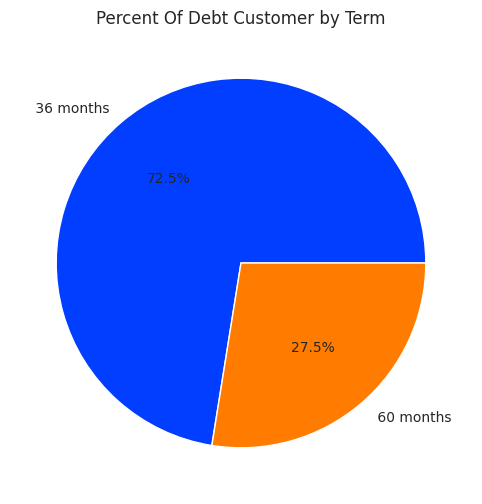

In [10]:
PiePlot(cat_fillted["term"],title="Percent Of Debt Customer by Term")
plt.show()

Dari visual tersebut, dapat disimpulkan bahwa peminjam memilih waktu pinjaman 

selama 36 bulan dengan tingkat bunga sebesar` 72.5%` dibandingkan memilih waktu 

pinjaman selama 60 bulan.

2. Mengetahui status nasabah bedasarkan `grade` dengan `term`

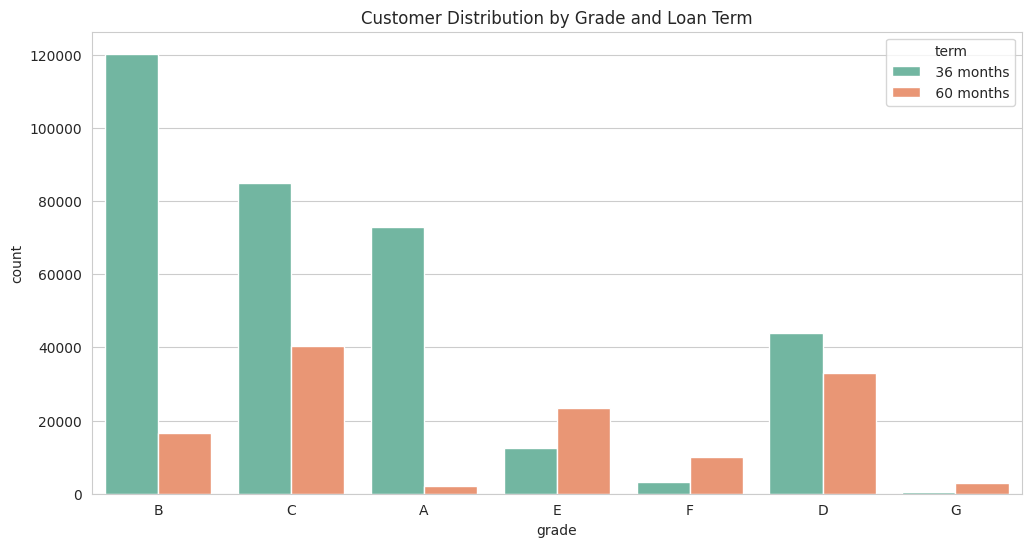

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=cat_fillted, x="grade", hue="term",palette="Set2")
plt.title("Customer Distribution by Grade and Loan Term")
plt.show()

jadi nasabah peminjam yang ada tertinggi untuk pemilihan jangka waktu 36 bulan adalah tingkat `B` sedankan untuk 60 tertinggi pada grade `C`

3. mengetahui profesi nasabah yang banyak di pinjam

Text(0.5, 1.0, 'Top 5 Employee Titles Distribution')

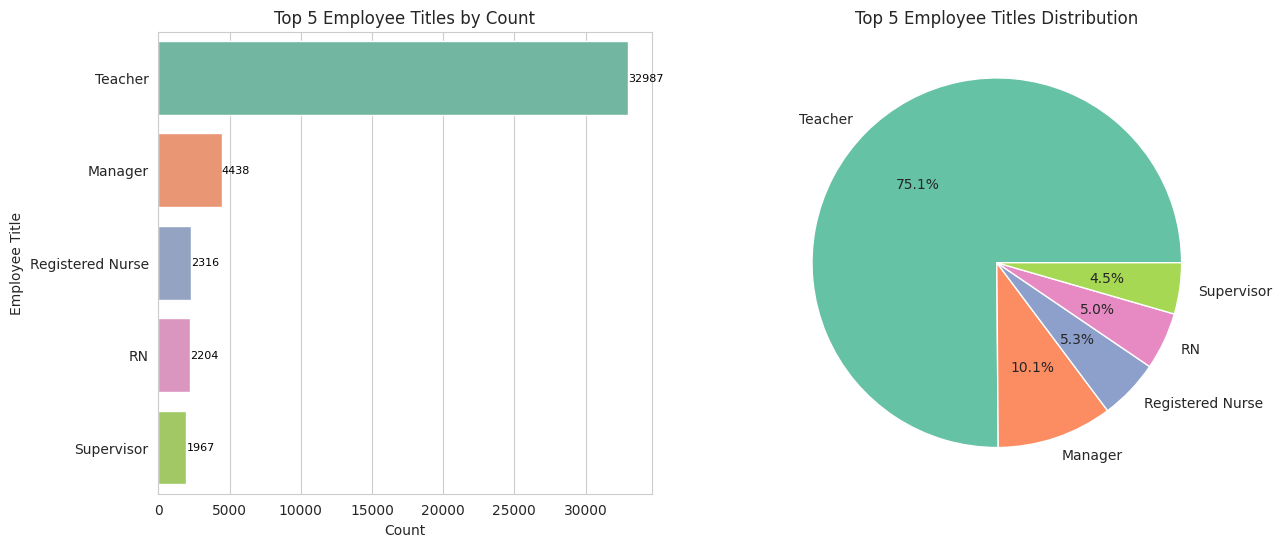

In [12]:
job_count_loan = cat_fillted["emp_title"].value_counts()[:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=cat_fillted, y="emp_title", order=job_count_loan.index[:5], palette="Set2", ax=axes[0])
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Employee Title")
axes[0].set_title("Top 5 Employee Titles by Count")
# to show up count
for i, count in enumerate(job_count_loan):
    axes[0].text(count, i, str(count), ha='left', va='center', color='black', fontsize=8)
axes[1].pie(job_count_loan, labels=job_count_loan.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[1].set_title("Top 5 Employee Titles Distribution")

dari visual tersebut peminjam itu,nasabah yang paling banyak melakukan pinjaman adalah profesi guru dengan persentase `75.1%`

dengan jumlah `32.987 orang`

In [13]:
cat_fillted["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

4. status tempat tinggal parah nasabah

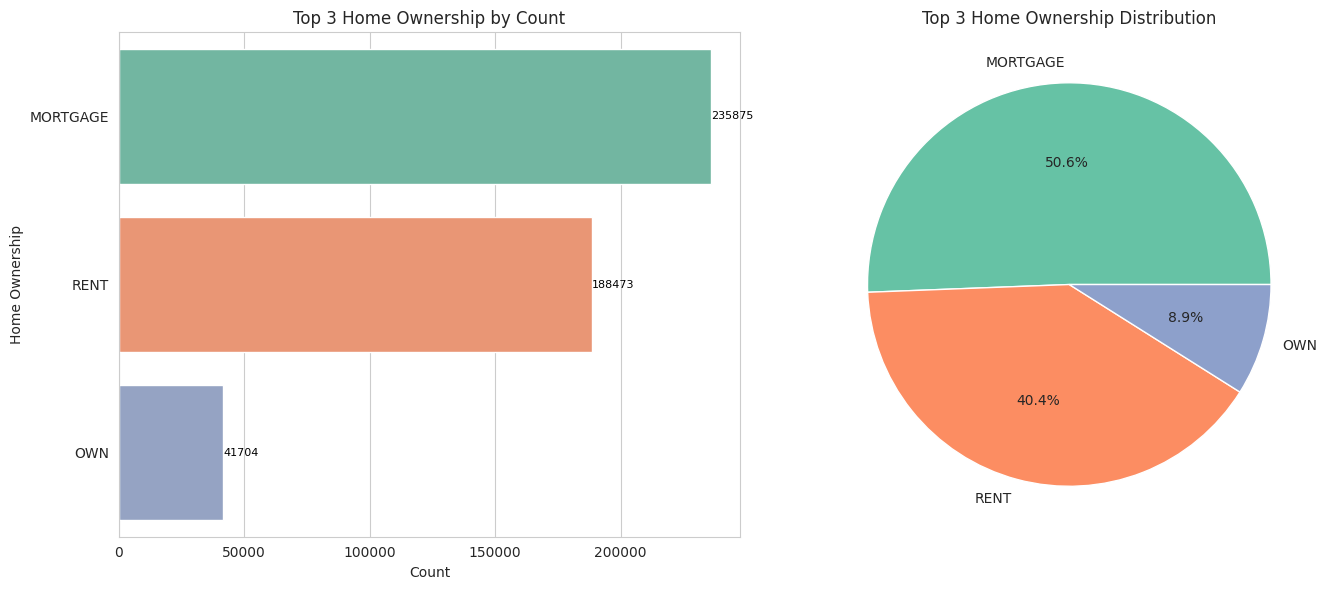

In [14]:
job_count_loan = cat_fillted["home_ownership"].value_counts()[:3]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=cat_fillted, y="home_ownership", order=job_count_loan.index[:5], palette="Set2", ax=axes[0])
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Home Ownership")
axes[0].set_title("Top 3 Home Ownership by Count")

# Show counts above the bars in the count plot
for i, count in enumerate(job_count_loan):
    axes[0].text(count, i, str(count), ha='left', va='center', color='black', fontsize=8)

# Pie plot on axes[1]
axes[1].pie(job_count_loan, labels=job_count_loan.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[1].set_title("Top 3 Home Ownership Distribution")

plt.tight_layout()
plt.show()


Peminjam dengan jumlah terbanyak memiliki status tempat tinggal masih

dalam bentuk pinjaman rumah, sebanyak `235.875 orang`

5. pengajuan seperti apa yang sering di masukan

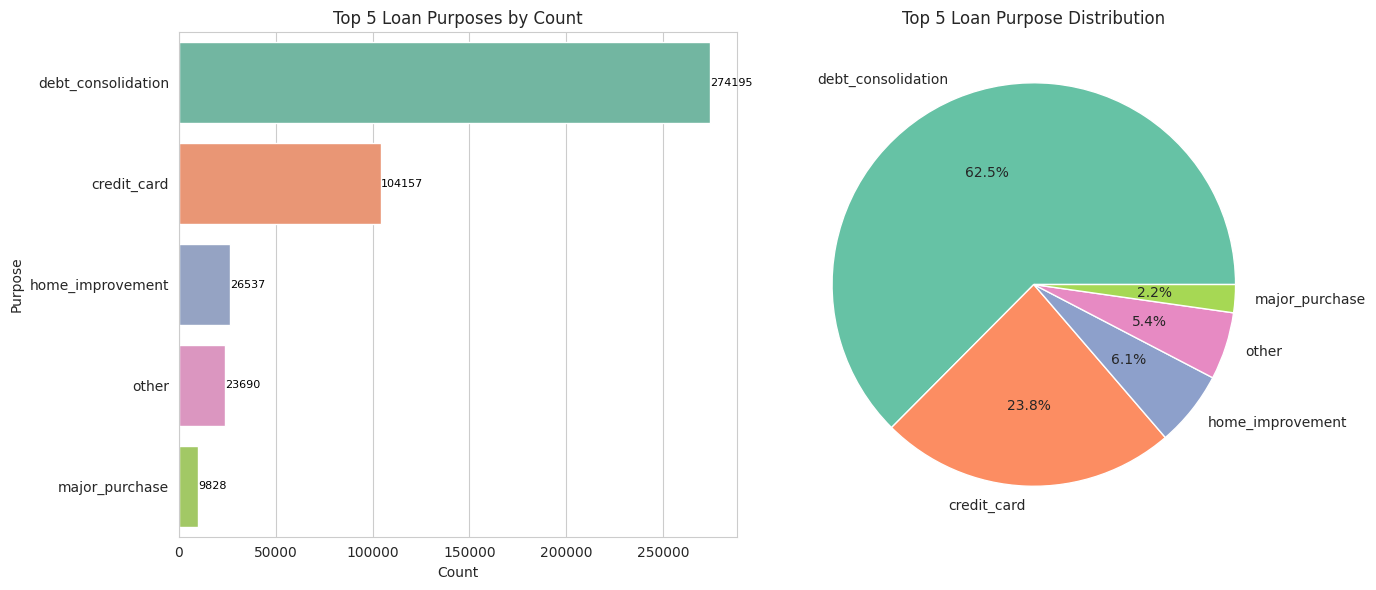

In [15]:
job_count_loan = cat_fillted["purpose"].value_counts()[:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=cat_fillted, y="purpose", order=job_count_loan.index, palette="Set2", ax=axes[0])
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Purpose")
axes[0].set_title("Top 5 Loan Purposes by Count")

# Show counts above the bars in the count plot
for i, count in enumerate(job_count_loan):
    axes[0].text(count, i, str(count), ha='left', va='center', color='black', fontsize=8)

# Pie plot for the distribution of top 3 purposes
axes[1].pie(job_count_loan, labels=job_count_loan.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
axes[1].set_title("Top 5 Loan Purpose Distribution")

plt.tight_layout()
plt.show()


### Feature Selection

jadi kita membuatkan fungsi feature selection,salah satu saya membuat nya dengan menggunakan method
`pearson correlation`

In [16]:
from Charlotte.feature_selection import pearson_correlation_selection
numerical_selected = pearson_correlation_selection(numerical_filled,.7)

In [17]:
numerical_selected

,loan_amnt,int_rate,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,mths_since_last_major_derog,policy_code,tot_coll_amt,tot_cur_bal
0,5000,10.65,24000.0,27.65,34.10443,74.306012,3.0,13648,83.7,9.0,0.00,0.00,0.00,42.852547,1,191.913517,138801.713385
1,2500,15.27,30000.0,1.00,34.10443,74.306012,3.0,1687,9.4,4.0,0.00,0.00,117.08,42.852547,1,191.913517,138801.713385
2,2400,15.96,12252.0,8.72,34.10443,74.306012,2.0,2956,98.5,10.0,0.00,0.00,0.00,42.852547,1,191.913517,138801.713385
3,10000,13.49,49200.0,20.00,35.00000,74.306012,10.0,5598,21.0,37.0,0.00,16.97,0.00,42.852547,1,191.913517,138801.713385
4,3000,12.69,80000.0,17.94,38.00000,74.306012,15.0,27783,53.9,38.0,766.90,0.00,0.00,42.852547,1,191.913517,138801.713385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,14.47,110000.0,19.85,34.10443,74.306012,18.0,23208,77.6,36.0,12574.00,0.00,0.00,42.852547,1,0.000000,294998.000000
466281,22000,19.97,78000.0,18.45,34.10443,116.000000,18.0,18238,46.3,30.0,0.00,0.00,0.00,42.852547,1,0.000000,221830.000000
466282,20700,16.99,46000.0,25.65,65.00000,74.306012,18.0,6688,51.1,43.0,14428.31,0.00,0.00,42.852547,1,0.000000,73598.000000
466283,2000,7.90,83000.0,5.39,13.00000,74.306012,21.0,11404,21.5,27.0,0.00,0.00,0.00,42.852547,1,0.000000,591610.000000


### Modeling Model Machine learning

In [18]:
cat_model_regession = cat_fillted[["term","grade","emp_length","home_ownership","application_type","purpose"]]
numeric_model_regession = numerical_selected[["annual_inc","open_acc","policy_code",]]
data_regression = pd.concat([cat_model_regession, numeric_model_regession,numerical_selected["loan_amnt"]], axis=1)
data_regression.head()

,term,grade,emp_length,home_ownership,application_type,purpose,annual_inc,open_acc,policy_code,loan_amnt
0,36 months,B,10+ years,RENT,INDIVIDUAL,credit_card,24000.0,3.0,1,5000
1,60 months,C,< 1 year,RENT,INDIVIDUAL,car,30000.0,3.0,1,2500
2,36 months,C,10+ years,RENT,INDIVIDUAL,small_business,12252.0,2.0,1,2400
3,36 months,C,10+ years,RENT,INDIVIDUAL,other,49200.0,10.0,1,10000
4,60 months,B,1 year,RENT,INDIVIDUAL,other,80000.0,15.0,1,3000


In [19]:
# labeling data categorical
import json
label_maps = {}

# Iterating through categorical columns
for col in data_regression.select_dtypes(include="object").columns:
    label_encoder = LabelEncoding()
    # Fit the encoder
    label_encoder.fit(data_regression[col])
    
    # Transform the column
    data_regression[col] = label_encoder.transform(data_regression[col])
    
    # Store the label mappings in the dictionary
    label_maps[col] = label_encoder.label_map

# Save the label mappings to a JSON file
with open("label_map_encoder.json", "w") as file:
    json.dump(label_maps, file)
data_regression.head()

,term,grade,emp_length,home_ownership,application_type,purpose,annual_inc,open_acc,policy_code,loan_amnt
0,0,1,1,5,0,1,24000.0,3.0,1,5000
1,1,2,10,5,0,0,30000.0,3.0,1,2500
2,0,2,1,5,0,11,12252.0,2.0,1,2400
3,0,2,1,5,0,9,49200.0,10.0,1,10000
4,1,1,0,5,0,9,80000.0,15.0,1,3000


In [ ]:
X = data_regression.iloc[:,:-1]
y = data_regression.iloc[:,-1]
